In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = 'Калибровка/'

In [3]:
g = 9.8155

In [4]:
#['%ID', 'MAG1', 'MAG2', 'MAG3', 'ACS1', 'ACS2', 'AKS3', 'GYRO1', 'GYRO2', 'GYRO3', 'HH MM SS MS']

In [5]:
def reconvert(log):
    new_log = []
#     new_log.append(['%ID', 'MAG1', 'MAG2', 'MAG3', 'ACS1', 'ACS2', 'AKS3', 'GYRO1', 'GYRO2', 'GYRO3', 'HH MM SS MS'])
    for i in log[3:]:
        new_log.append([int(j) for j in (i[1:42].replace('\t', ' ')+' '+str((int(i[46:48])-10)*60*60*1000+int(i[49:51])*60*1000+int(i[52:54])*1000+int(i[55:58]))).split(' ')])
    return new_log

# AKS-1

In [6]:
with open(path+'INS-MEMS-aks1.log', 'r', encoding='UTF-8') as a1:
    aks1 = np.array(reconvert(a1.readlines()))

In [7]:
aks1 = np.vstack((aks1[:825], aks1[827:]))

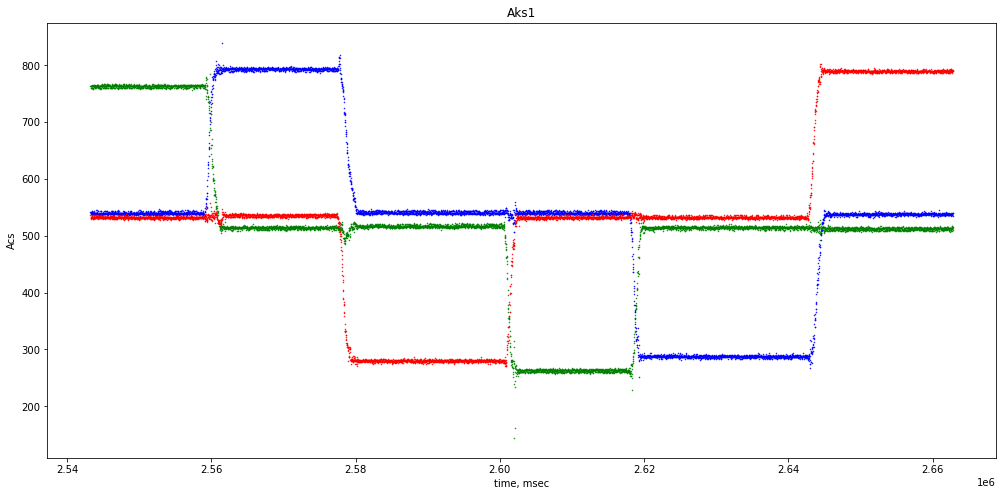

In [8]:
plt.figure(figsize=(17, 8))
plt.title('Aks1')
plt.xlabel(r'time, msec')
plt.ylabel(r'Acs')

plt.scatter(aks1.T[10], aks1.T[4], color='g', s=0.25)
plt.scatter(aks1.T[10], aks1.T[5], color='b', s=0.25)
plt.scatter(aks1.T[10], aks1.T[6], color='r', s=0.25)

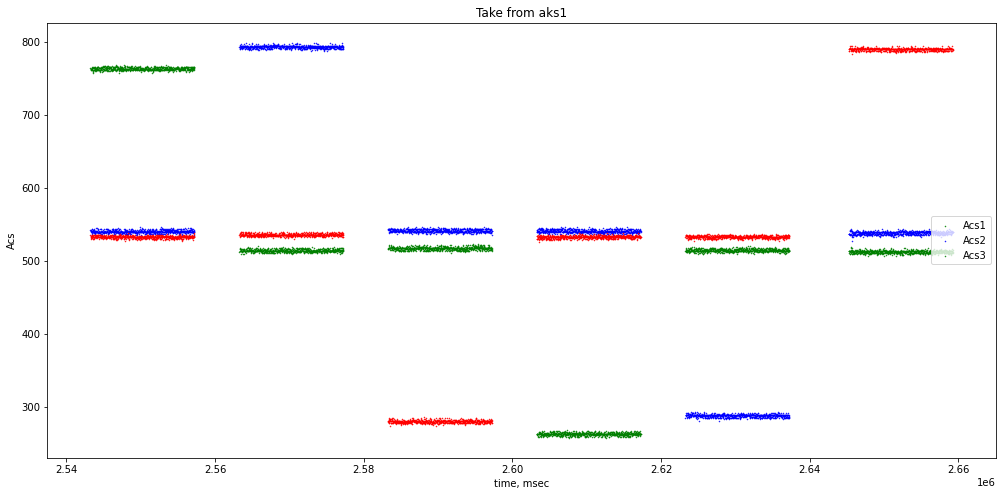

In [9]:
plt.figure(figsize=(17, 8))
plt.title('Take from aks1')
plt.xlabel(r'time, msec')
plt.ylabel(r'Acs')

plt.scatter(aks1[0:700].T[10], aks1[0:700].T[4], color='g', s=0.25, label='Acs1')
plt.scatter(aks1[3000:3700].T[10], aks1[3000:3700].T[4], color='g', s=0.25)
plt.scatter(aks1[0:700].T[10], aks1[0:700].T[5], color='b', s=0.25)
plt.scatter(aks1[3000:3700].T[10], aks1[3000:3700].T[5], color='b', s=0.25)
plt.scatter(aks1[0:700].T[10], aks1[0:700].T[6], color='r', s=0.25)
plt.scatter(aks1[3000:3700].T[10], aks1[3000:3700].T[6], color='r', s=0.25)
plt.scatter(aks1[1000:1700].T[10], aks1[1000:1700].T[5], color='b', s=0.25, label='Acs2')
plt.scatter(aks1[4000:4700].T[10], aks1[4000:4700].T[5], color='b', s=0.25)
plt.scatter(aks1[1000:1700].T[10], aks1[1000:1700].T[4], color='g', s=0.25)
plt.scatter(aks1[4000:4700].T[10], aks1[4000:4700].T[4], color='g', s=0.25)
plt.scatter(aks1[1000:1700].T[10], aks1[1000:1700].T[6], color='r', s=0.25)
plt.scatter(aks1[4000:4700].T[10], aks1[4000:4700].T[6], color='r', s=0.25)
plt.scatter(aks1[2000:2700].T[10], aks1[2000:2700].T[4], color='g', s=0.25, label='Acs3')
plt.scatter(aks1[5100:5800].T[10], aks1[5100:5800].T[4], color='g', s=0.25)
plt.scatter(aks1[2000:2700].T[10], aks1[2000:2700].T[5], color='b', s=0.25)
plt.scatter(aks1[5100:5800].T[10], aks1[5100:5800].T[5], color='b', s=0.25)
plt.scatter(aks1[2000:2700].T[10], aks1[2000:2700].T[6], color='r', s=0.25)
plt.scatter(aks1[5100:5800].T[10], aks1[5100:5800].T[6], color='r', s=0.25)
plt.legend(loc='center right')

In [10]:
def sagz_with_g(plus, minus):
    return (-np.mean(minus)+np.mean(plus))/(2*g)

In [11]:
Sagz_x = sagz_with_g(aks1[0:700].T[4], aks1[3000:3700].T[4])
Sagz_xy = sagz_with_g(aks1[0:700].T[5], aks1[3000:3700].T[5])
Sagz_xz = sagz_with_g(aks1[0:700].T[6], aks1[3000:3700].T[6])
Sagz_y = sagz_with_g(aks1[1000:1700].T[5], aks1[4000:4700].T[5])
Sagz_yx = sagz_with_g(aks1[1000:1700].T[4], aks1[4000:4700].T[4])
Sagz_yz = sagz_with_g(aks1[1000:1700].T[6], aks1[4000:4700].T[6])
Sagz_z = sagz_with_g(aks1[2000:2700].T[6], aks1[5100:5800].T[6])
Sagz_zx = sagz_with_g(aks1[2000:2700].T[4], aks1[5100:5800].T[4])
Sagz_zy = sagz_with_g(aks1[2000:2700].T[5], aks1[5100:5800].T[5])
# Sagz_z = sagz_with_g(aks1[5100:5800].T[6], aks1[2000:2700].T[6])
# Sagz_zx = sagz_with_g(aks1[5100:5800].T[4], aks1[2000:2700].T[4])
# Sagz_zy = sagz_with_g(aks1[5100:5800].T[5], aks1[2000:2700].T[5])

In [12]:
Sa_aks1 = np.array([[Sagz_x, Sagz_yx, Sagz_zx],
                    [Sagz_xy, Sagz_y, Sagz_zy],
                    [Sagz_xz, Sagz_yz, Sagz_z]])

In [13]:
Sf_aks1 = np.linalg.inv(Sa_aks1)

In [14]:
Sf_aks1

array([[ 3.92124130e-02,  2.74507621e-05,  3.66625916e-04],
       [ 3.65736410e-05,  3.88264929e-02,  2.35212342e-04],
       [-1.75495422e-06,  2.35412840e-04, -3.84832032e-02]])

In [15]:
def ba_aks1(plus, minus):
    return (np.mean(plus) + np.mean(minus))/(2)

In [16]:
ba_x = ba_aks1(aks1[0:700].T[4], aks1[3000:3700].T[4])
ba_xy = ba_aks1(aks1[0:700].T[5], aks1[3000:3700].T[5])
ba_xz = ba_aks1(aks1[0:700].T[6], aks1[3000:3700].T[6])
ba_yx = ba_aks1(aks1[1000:1700].T[4], aks1[4000:4700].T[4])
ba_y = ba_aks1(aks1[1000:1700].T[5], aks1[4000:4700].T[5])
ba_yz = ba_aks1(aks1[1000:1700].T[6], aks1[4000:4700].T[6])
ba_zx = ba_aks1(aks1[5100:5800].T[4], aks1[2000:2700].T[4])
ba_zy = ba_aks1(aks1[5100:5800].T[5], aks1[2000:2700].T[5])
ba_z = ba_aks1(aks1[5100:5800].T[6], aks1[2000:2700].T[6])

In [17]:
ba_aks1 = np.array([np.mean([ba_x, ba_yx, ba_zx]),
          np.mean([ba_xy, ba_y, ba_zy]),
          np.mean([ba_xz, ba_yz, ba_z])])
ba_aks1

array([513.86571429, 540.19928571, 533.87690476])

In [18]:
bf_aks1 = -np.dot(Sf_aks1, ba_aks1)
bf_aks1

array([-20.36047662, -21.11841209,  20.41902537])

In [19]:
np.dot(Sf_aks1, aks1.T[4:7].T[0]) + bf_aks1

array([ 9.80919674,  0.07956312, -0.08171857])

In [20]:
prepared_aks1 = []
for i in range(len(aks1)):
    prepared_aks1.append(np.dot(Sf_aks1, aks1.T[4:7].T[i]) + bf_aks1)
prepared_aks1 = np.array(prepared_aks1)

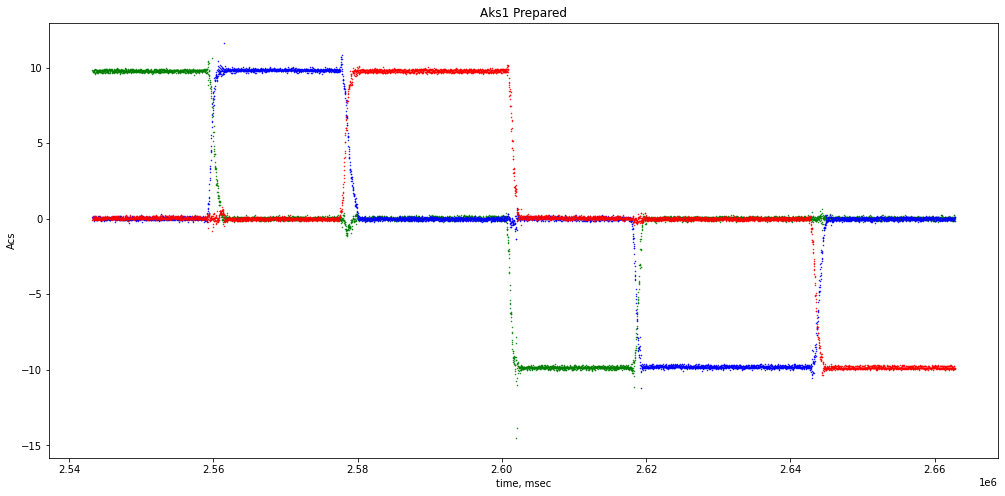

In [21]:
plt.figure(figsize=(17, 8))
plt.title('Aks1 Prepared')
plt.xlabel(r'time, msec')
plt.ylabel(r'Acs')

plt.scatter(aks1.T[10], prepared_aks1.T[0], color='g', s=0.25)
plt.scatter(aks1.T[10], prepared_aks1.T[1], color='b', s=0.25)
plt.scatter(aks1.T[10], prepared_aks1.T[2], color='r', s=0.25)

# GYRO

In [22]:
with open(path+'INS-MEMS-DUS1.log', 'r', encoding='UTF-8') as a2:
    aks2 = np.array(reconvert(a2.readlines()))

In [23]:
aks2 = aks2.T[7:11].T

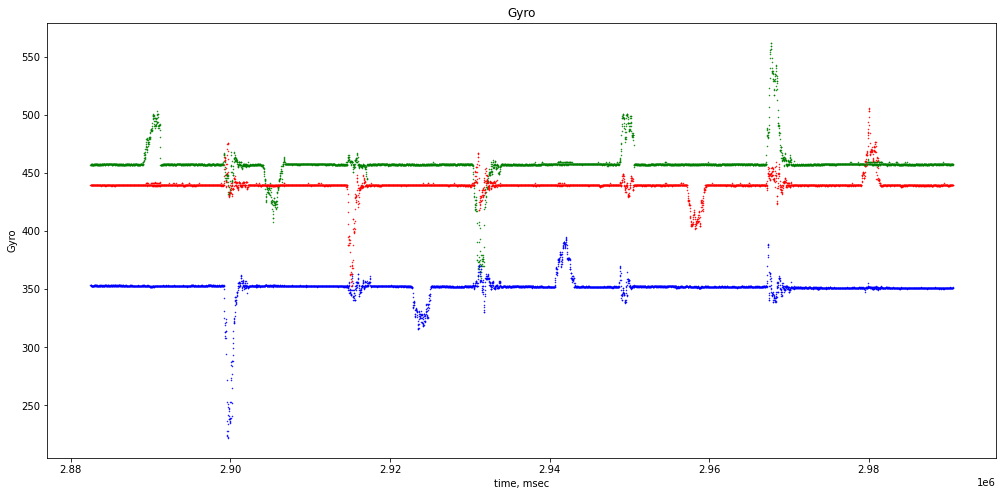

In [24]:
plt.figure(figsize=(17, 8))
plt.title('Gyro')
plt.xlabel(r'time, msec')
plt.ylabel(r'Gyro')

plt.scatter(aks2.T[3], aks2.T[0], color='g', s=0.25)
plt.scatter(aks2.T[3], aks2.T[1], color='b', s=0.25)
plt.scatter(aks2.T[3], aks2.T[2], color='r', s=0.25)

In [25]:
def bg_aks2(i):
    sum = 0
    el = [aks2[0:300].T[i], aks2[476:800].T[i], aks2[950:1050].T[i], aks2[1226:1550].T[i], aks2[1800:1985].T[i], aks2[2161:2400].T[i], aks2[2600:2900].T[i], aks2[3876:4200].T[i], aks2[4400:4800].T[i], aks2[3076:3250].T[i], aks2[3450:3700].T[i], aks2[4976:].T[i]]
    for itm in el:
        sum += np.mean(itm)
    return sum/len(el)

In [26]:
bg2_x = bg_aks2(0)
bg2_y = bg_aks2(1)
bg2_z = bg_aks2(2)

In [27]:
bg_aks2 = np.array([bg2_x,
          bg2_y,
          bg2_z])
bg_aks2

array([457.59365934, 352.43912623, 439.93619873])

In [28]:
aks2_zero = np.array([i - bg_aks2 for i in aks2.T[0:3].T])

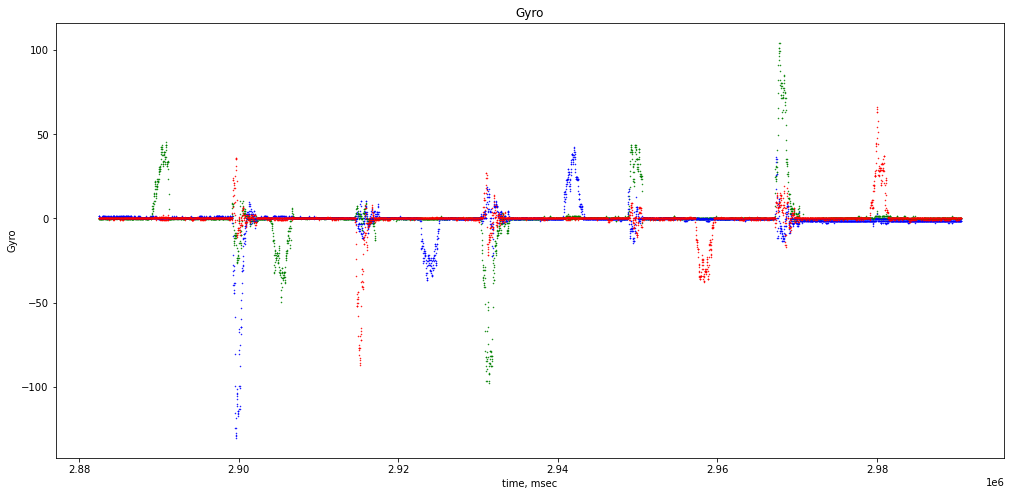

In [29]:
plt.figure(figsize=(17, 8))
plt.title('Gyro')
plt.xlabel(r'time, msec')
plt.ylabel(r'Gyro')

plt.scatter(aks2.T[3], aks2_zero.T[0], color='g', s=0.25)
plt.scatter(aks2.T[3], aks2_zero.T[1], color='b', s=0.25)
plt.scatter(aks2.T[3], aks2_zero.T[2], color='r', s=0.25)

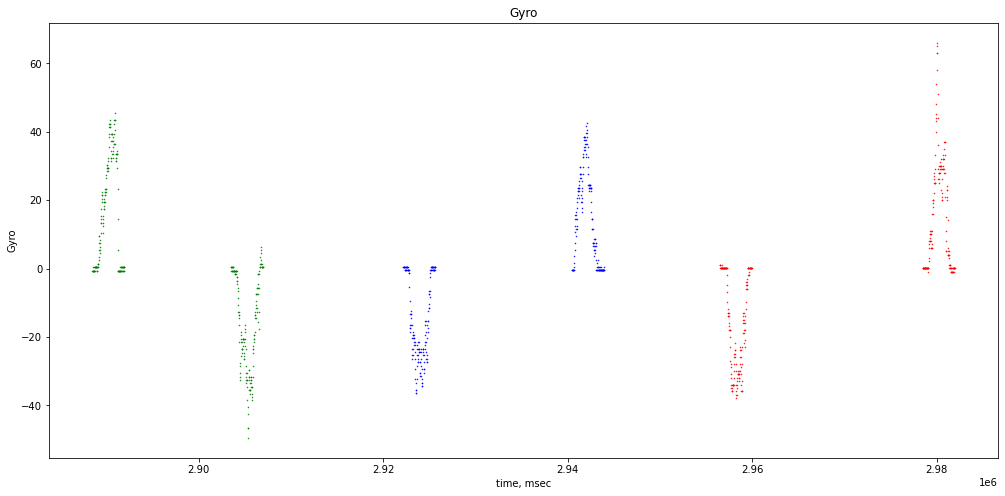

In [30]:
plt.figure(figsize=(17, 8))
plt.title('Gyro')
plt.xlabel(r'time, msec')
plt.ylabel(r'Gyro')

plt.scatter(aks2.T[3][300:475], aks2_zero.T[0][300:475], color='g', s=0.25)
plt.scatter(aks2.T[3][1050:1225], aks2_zero.T[0][1050:1225], color='g', s=0.25)
plt.scatter(aks2.T[3][1985:2160], aks2_zero.T[1][1985:2160], color='b', s=0.25)
plt.scatter(aks2.T[3][2900:3075], aks2_zero.T[1][2900:3075], color='b', s=0.25)
plt.scatter(aks2.T[3][3700:3875], aks2_zero.T[2][3700:3875], color='r', s=0.25)
plt.scatter(aks2.T[3][4800:4975], aks2_zero.T[2][4800:4975], color='r', s=0.25)

In [31]:
def delta_phi(phi, time):
    sum_phi = 0
    for i in range(len(phi)-1):
        if time[i+1] != time[i]:
            sum_phi += (phi[i+1]+phi[i])/2*(time[i+1]-time[i])/1000
    return sum_phi

In [32]:
delta_phi_x1 = delta_phi(aks2_zero.T[0][300:475], aks2.T[3][300:475])
delta_phi_x2 = delta_phi(aks2_zero.T[0][1050:1225], aks2.T[3][1050:1225])
delta_phi_xy1 = delta_phi(aks2_zero.T[1][300:475], aks2.T[3][300:475])
delta_phi_xy2 = delta_phi(aks2_zero.T[1][1050:1225], aks2.T[3][1050:1225])
delta_phi_xz1 = delta_phi(aks2_zero.T[2][300:475], aks2.T[3][300:475])
delta_phi_xz2 = delta_phi(aks2_zero.T[2][1050:1225], aks2.T[3][1050:1225])
delta_phi_yx1 = delta_phi(aks2_zero.T[0][1985:2160], aks2.T[3][1985:2160])
delta_phi_yx2 = delta_phi(aks2_zero.T[0][2900:3075], aks2.T[3][2900:3075])
delta_phi_y1 = delta_phi(aks2_zero.T[1][1985:2160], aks2.T[3][1985:2160])
delta_phi_y2 = delta_phi(aks2_zero.T[1][2900:3075], aks2.T[3][2900:3075])
delta_phi_yz1 = delta_phi(aks2_zero.T[2][1985:2160], aks2.T[3][1985:2160])
delta_phi_yz2 = delta_phi(aks2_zero.T[2][2900:3075], aks2.T[3][2900:3075])
delta_phi_zx1 = delta_phi(aks2_zero.T[0][3700:3875], aks2.T[3][3700:3875])
delta_phi_zx2 = delta_phi(aks2_zero.T[0][4800:4975], aks2.T[3][4800:4975])
delta_phi_zy1 = delta_phi(aks2_zero.T[1][3700:3875], aks2.T[3][3700:3875])
delta_phi_zy2 = delta_phi(aks2_zero.T[1][4800:4975], aks2.T[3][4800:4975])
delta_phi_z1 = delta_phi(aks2_zero.T[2][3700:3875], aks2.T[3][3700:3875])
delta_phi_z2 = delta_phi(aks2_zero.T[2][4800:4975], aks2.T[3][4800:4975])

In [33]:
phi_z = 3.1415926535/2

In [34]:
def delta_mean(x1, x2):
    return (x1 - x2) / (phi_z*2)

In [35]:
Sa_aks2 = np.array([[delta_mean(delta_phi_x1, delta_phi_x2), delta_mean(delta_phi_yx1, delta_phi_yx2), delta_mean(delta_phi_zx1, delta_phi_zx2)],
                    [delta_mean(delta_phi_xy1, delta_phi_xy2), delta_mean(delta_phi_y1, delta_phi_y2), delta_mean(delta_phi_zy1, delta_phi_zy2)],
                    [delta_mean(delta_phi_xz1, delta_phi_xz2), delta_mean(delta_phi_yz1, delta_phi_yz2), delta_mean(delta_phi_z1, delta_phi_z2)]])

In [36]:
Sf_aks2 = np.linalg.inv(Sa_aks2)
Sf_aks2

array([[ 2.82866170e-02, -6.94391042e-04, -3.88704638e-04],
       [-1.91372589e-04, -3.07128736e-02, -9.36691824e-04],
       [ 2.06999908e-04, -1.96023560e-05, -2.97052239e-02]])

In [37]:
bf_aks2 = -np.dot(Sf_aks2, bg_aks2)
bf_aks2

array([-12.52804075,  11.32407384,  12.98059009])

In [38]:
prepared_aks2 = []
for i in range(len(aks2)):
    prepared_aks2.append(np.dot(Sf_aks2, aks2.T[0:3].T[i]) + bf_aks2)
prepared_aks2 = np.array(prepared_aks2)

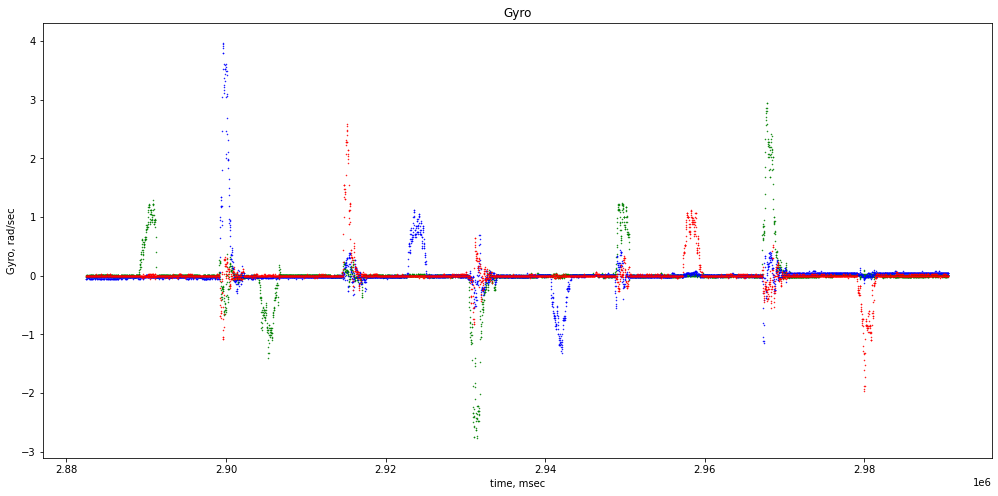

In [39]:
plt.figure(figsize=(17, 8))
plt.title('Gyro')
plt.xlabel(r'time, msec')
plt.ylabel(r'Gyro, rad/sec')

plt.scatter(aks2.T[3], prepared_aks2.T[0], color='g', s=0.25)
plt.scatter(aks2.T[3], prepared_aks2.T[1], color='b', s=0.25)
plt.scatter(aks2.T[3], prepared_aks2.T[2], color='r', s=0.25)

##### Проверка - интегрирование обработанных данных

In [40]:
delta_phi(prepared_aks2.T[0][300:475], aks2.T[3][300:475])

1.6060459022508933

In [41]:
delta_phi(prepared_aks2.T[0][1050:1225], aks2.T[3][1050:1225])

-1.535546751249105

In [42]:
delta_phi(prepared_aks2.T[1][1985:2160], aks2.T[3][1985:2160])

1.550485770466616

In [43]:
delta_phi(prepared_aks2.T[1][2900:3075], aks2.T[3][2900:3075])

-1.5911068830333854

In [44]:
delta_phi(prepared_aks2.T[2][3700:3875], aks2.T[3][3700:3875])

1.571307761094049

In [45]:
delta_phi(prepared_aks2.T[2][4800:4975], aks2.T[3][4800:4975])

-1.5702848924059531

# AKS-2

In [46]:
# with open(path+'INS-MEMS-aks2-18.log', 'r', encoding='UTF-8') as a3:
#     aks3 = np.array(reconvert(a3.readlines()))